In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.cross_validation import cross_val_score as cvs
from sklearn.model_selection import cross_val_predict as cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import IsolationForest

rcParams['figure.figsize'] = 15, 10
%config InlineBackend.figure_format = 'retina'  # более качественное отображение графиков

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # вывод всех запрошенных переменных ячейки

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
DF = pd.read_csv("train.csv", index_col="Time")
DF

,tag00,tag01,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag02,tag15,tag16,tag17,tag18
Time,,,,,,,,,,,,,,,,,
0.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
1.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
2.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
3.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
4.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
5.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
6.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
7.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
8.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000


Вводим функцию, которая вырезает моменты стагнации и вычитает из каждой строки предыдущую.

In [3]:
def differ(DF):
    DF.drop_duplicates(inplace=True)
    DF["Time"] = DF.index
    DF2 = DF.copy()
    DF2 = DF2.iloc[:len(DF2) - 1]
    DF = DF.iloc[1:]
    DF2.index = DF.index
    return DF - DF2
DF = differ(DF)

Обучаем чудо-лес

In [5]:
IF = IsolationForest(n_estimators=100).fit(DF)
res = IF.decision_function(DF)

Таково распределение скоров. Судя по всему, есть большой кластер (скоры от 0,075 до 0.20) и маленький (меньше 0.075).

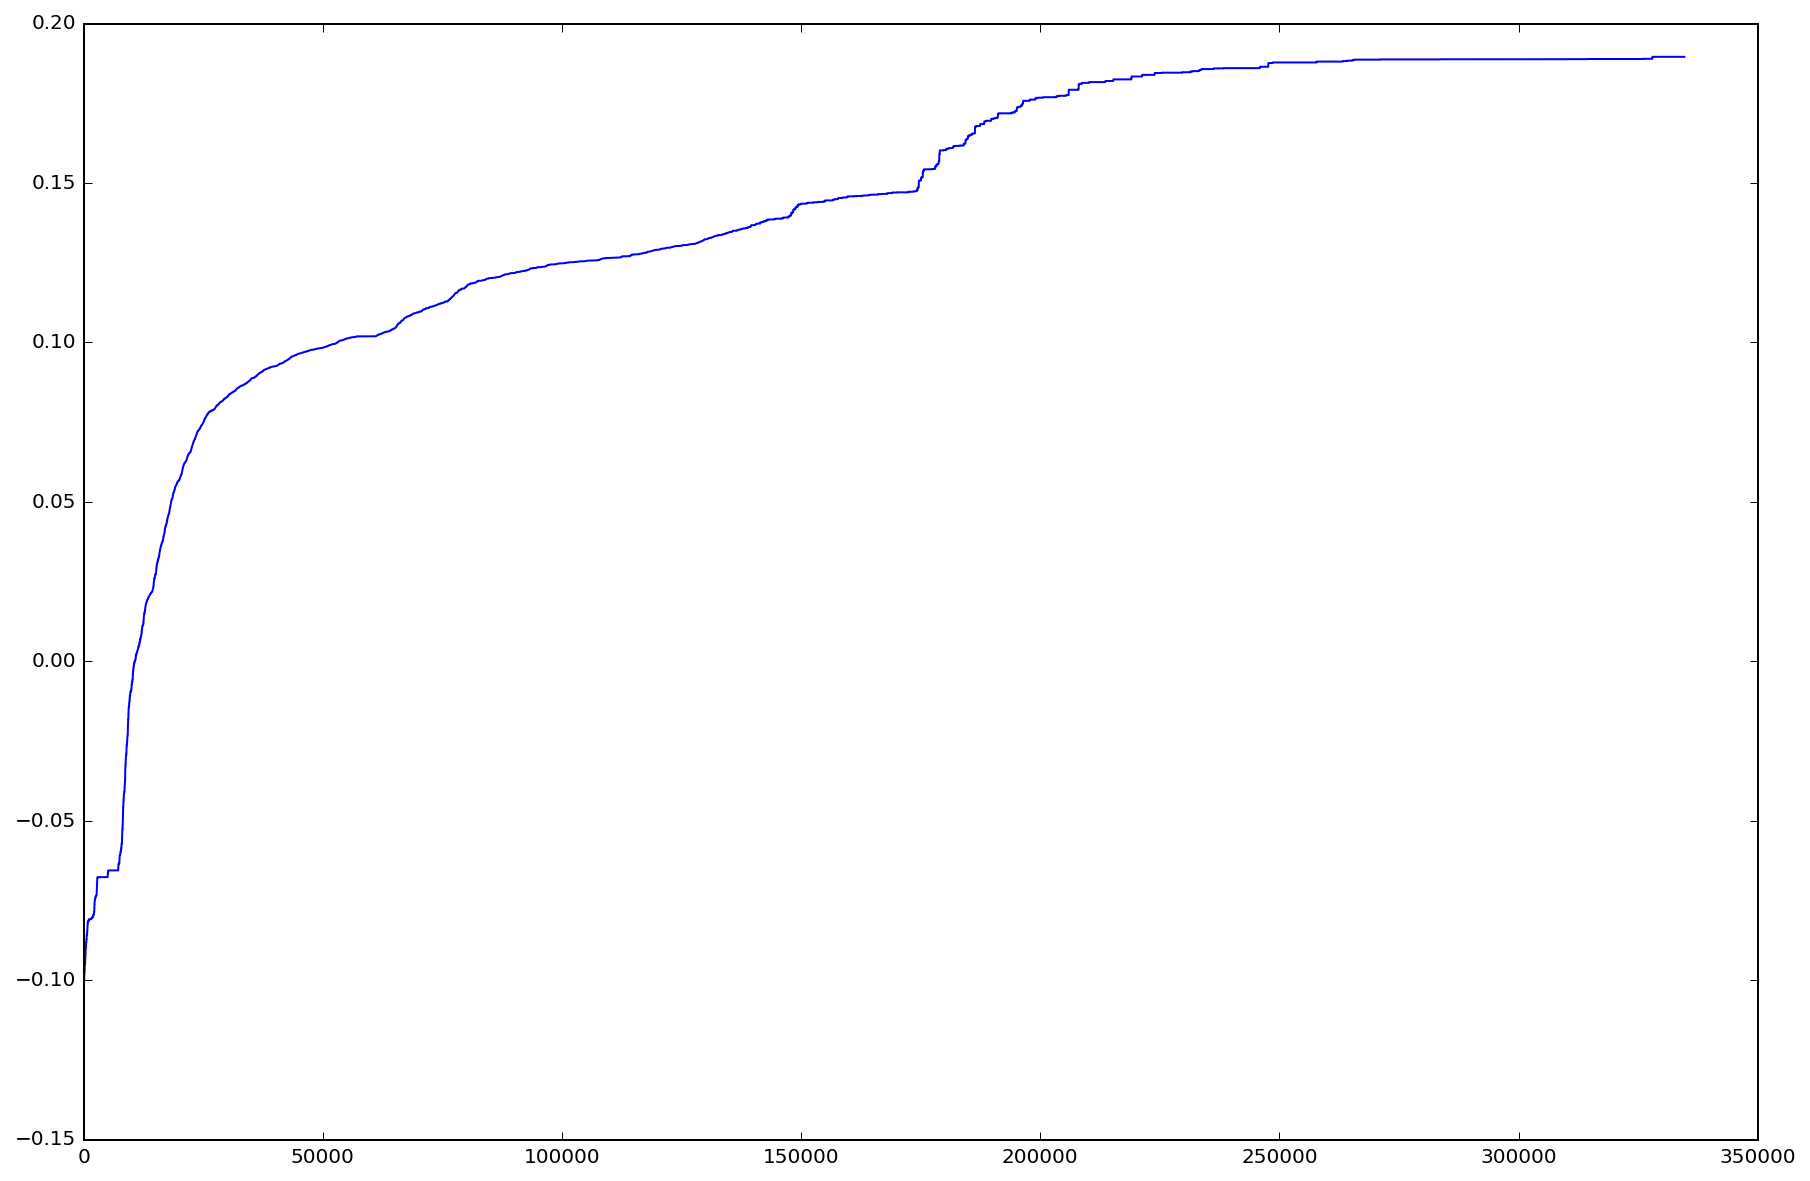

In [13]:
plt.plot(sorted(res))

Грузим тест1 и применяем тот же лес.

In [7]:
TDF = pd.read_csv("test//01_test.csv", index_col="Time")
TDF = differ(TDF)
TDF.dropna(inplace=True)

In [8]:
test_res = IF.decision_function(TDF)

Распределение скоров примерно такое же. Явных аномалий нет!

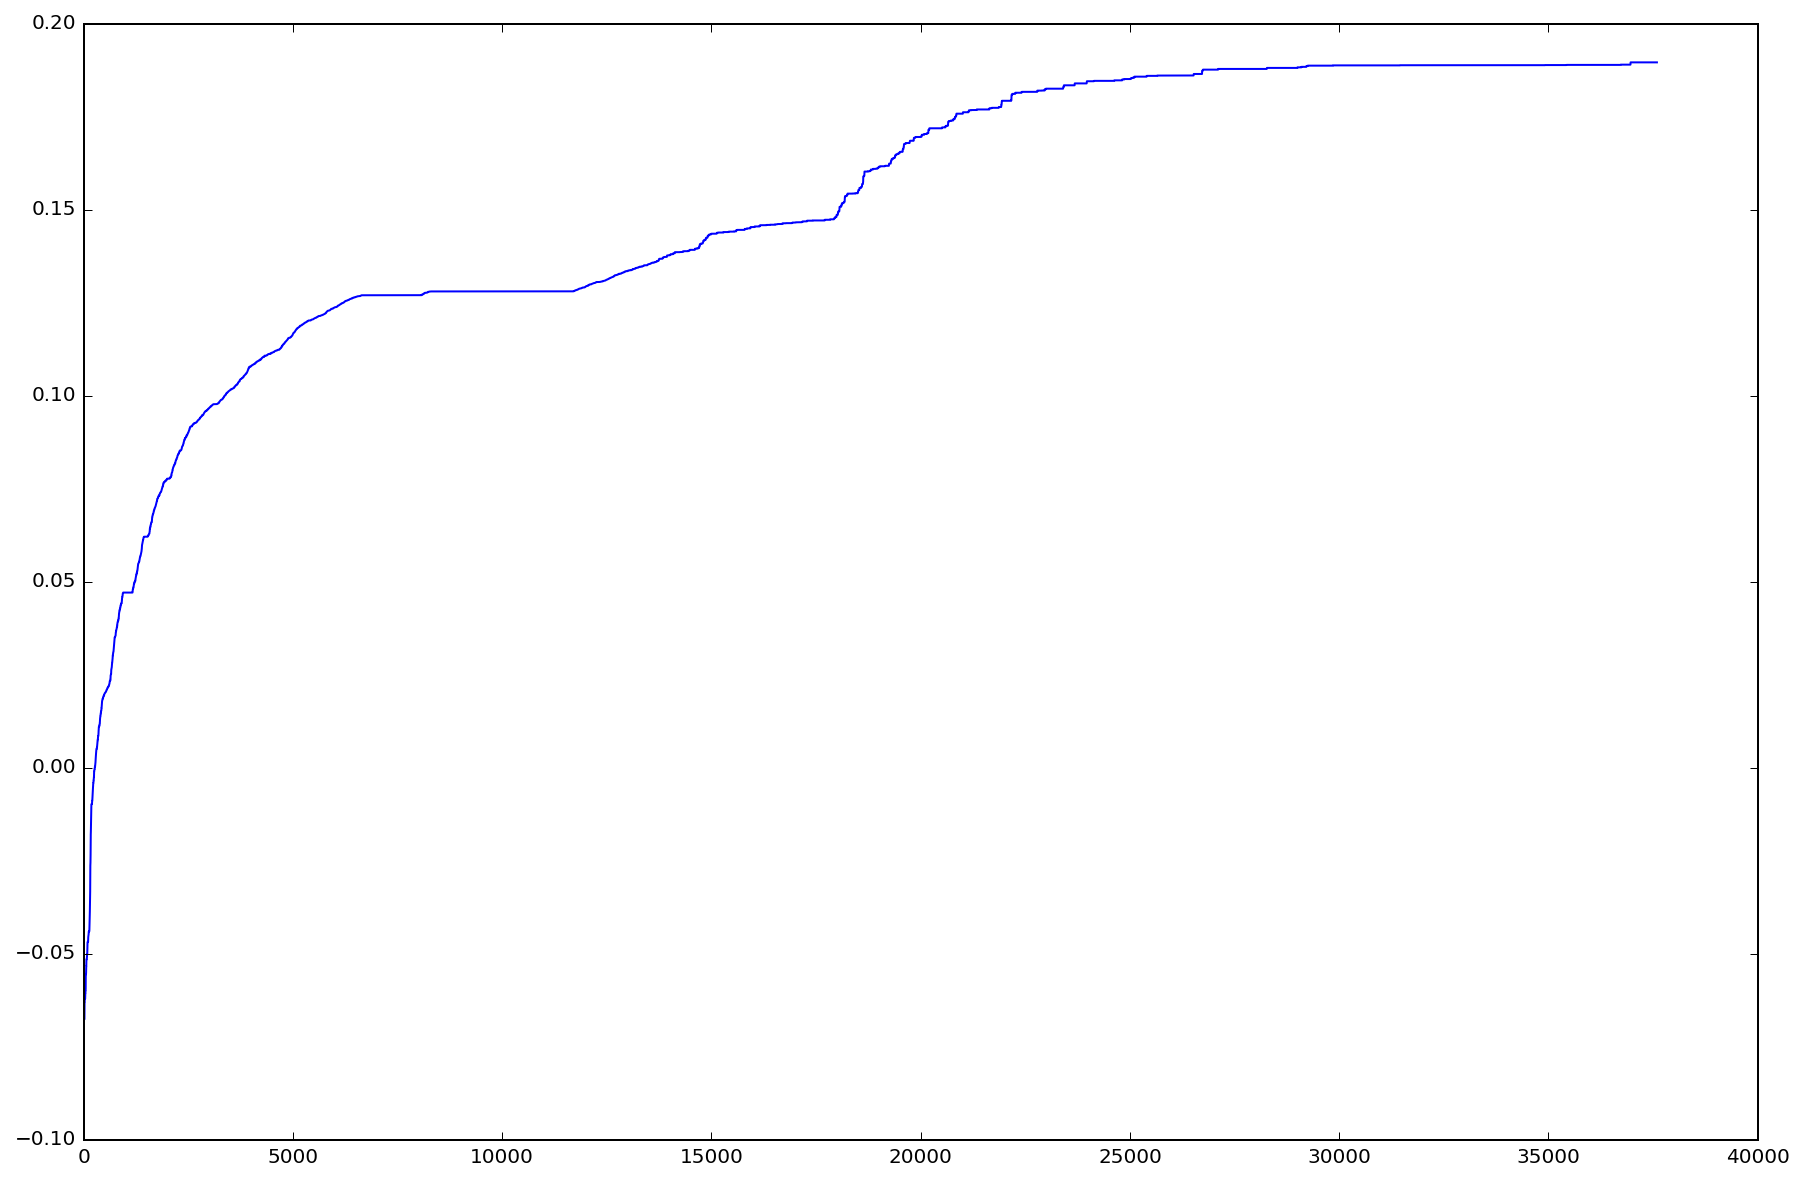

In [15]:
plt.plot(sorted(test_res))

Но тогда посмотрим динамику этих скоров. Вот если взять трейн и посмотреть картинку на нём, то выяснится, что есть такая вот интересная закономерность Сначала ЧТО-ТО ПРОИСХОДИТ, в этот момент изменения скачут из одного кластера в другой (эти моменты времени следует изучить подробнее - там внутри я вижу параболу какую-то!), а потом по очень похожим дугам с 2-3 сосульками возвращается в большой кластер.

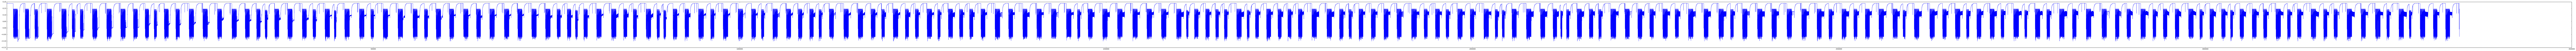

In [10]:
rcParams['figure.figsize'] = 280, 5
plt.plot(res)

Теперь взглянем на тест. Видно, что начиная с некоторого момента появилось какое-то непонятное число сосулек в момент перехода от состояния ЧТОТОДЕЛАЕМ.

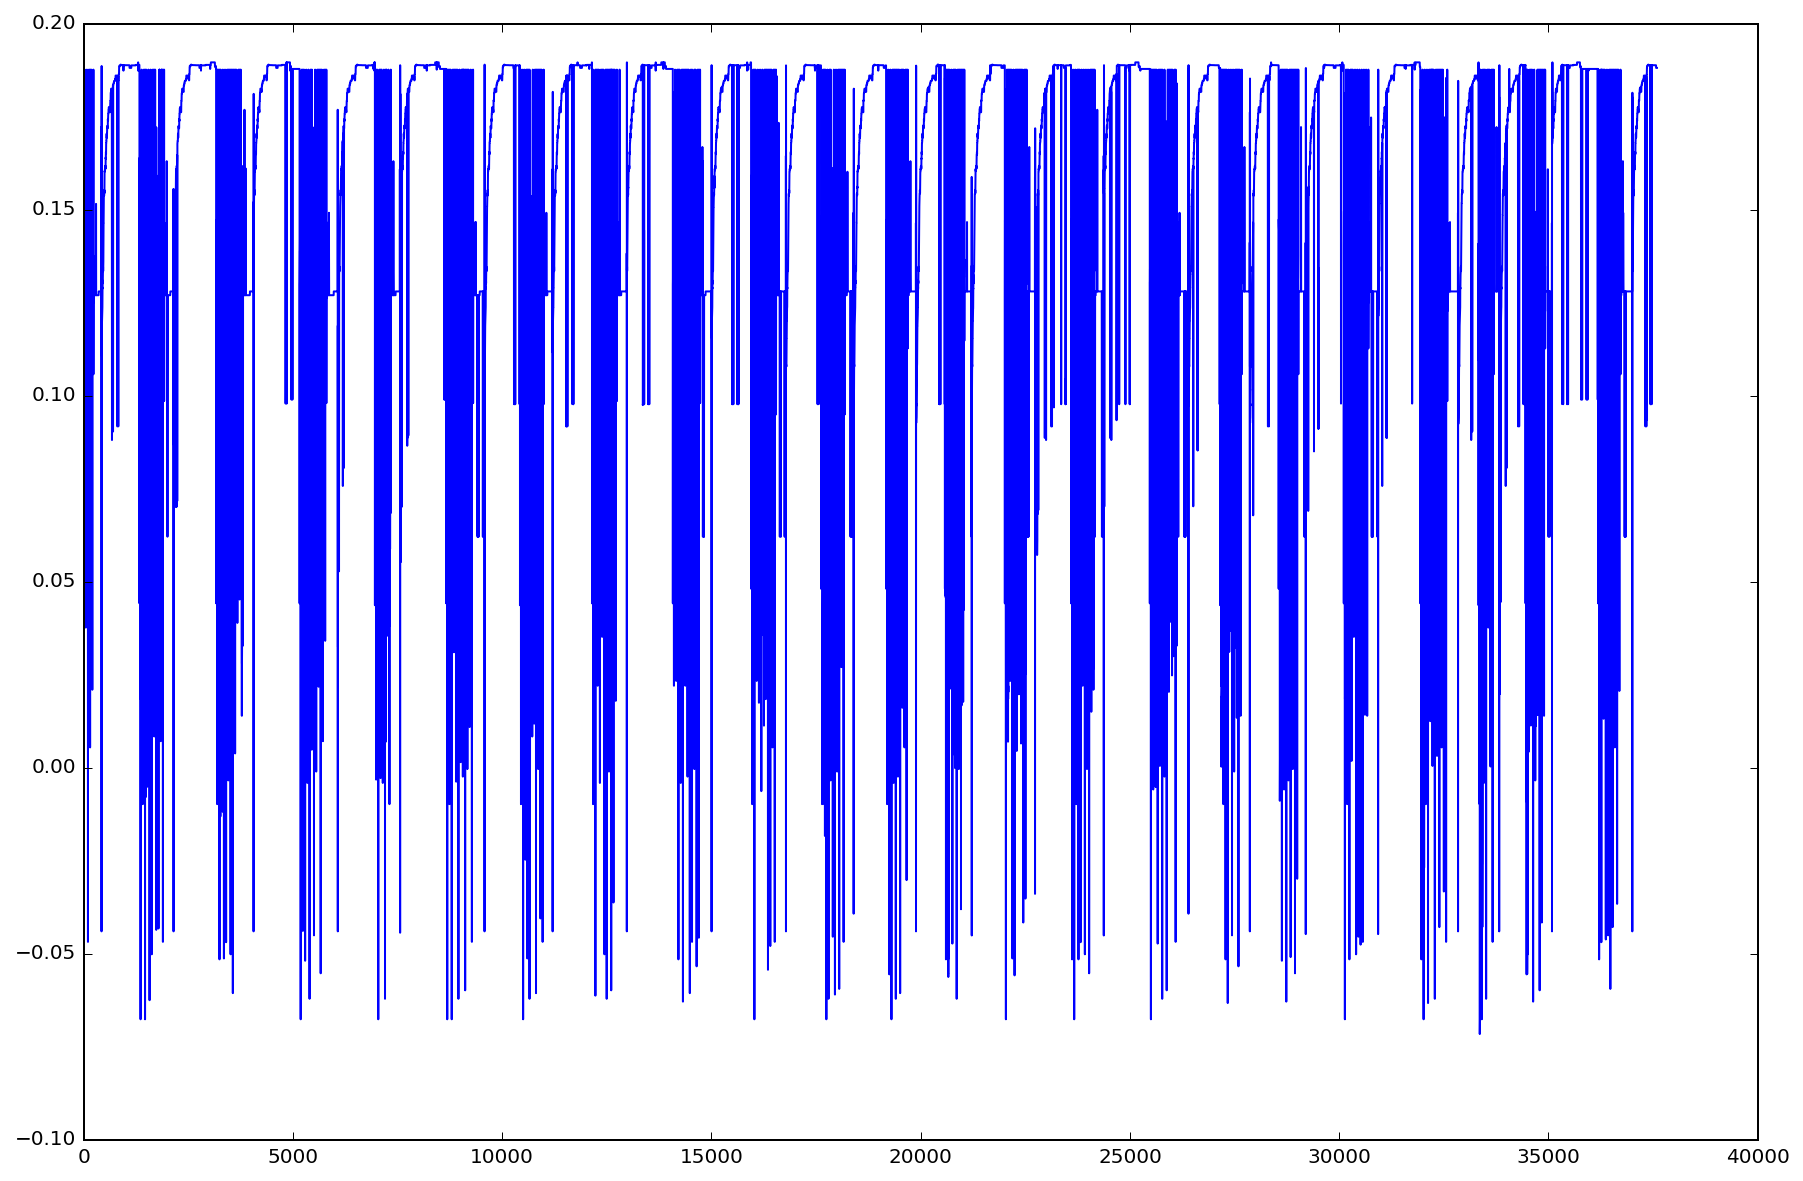

In [12]:
rcParams['figure.figsize'] = 15, 10
plt.plot(test_res)

In [18]:
TDF = pd.read_csv("test//02_test.csv", index_col="Time")
TDF = differ(TDF)
TDF.dropna(inplace=True)

test_res = IF.decision_function(TDF)

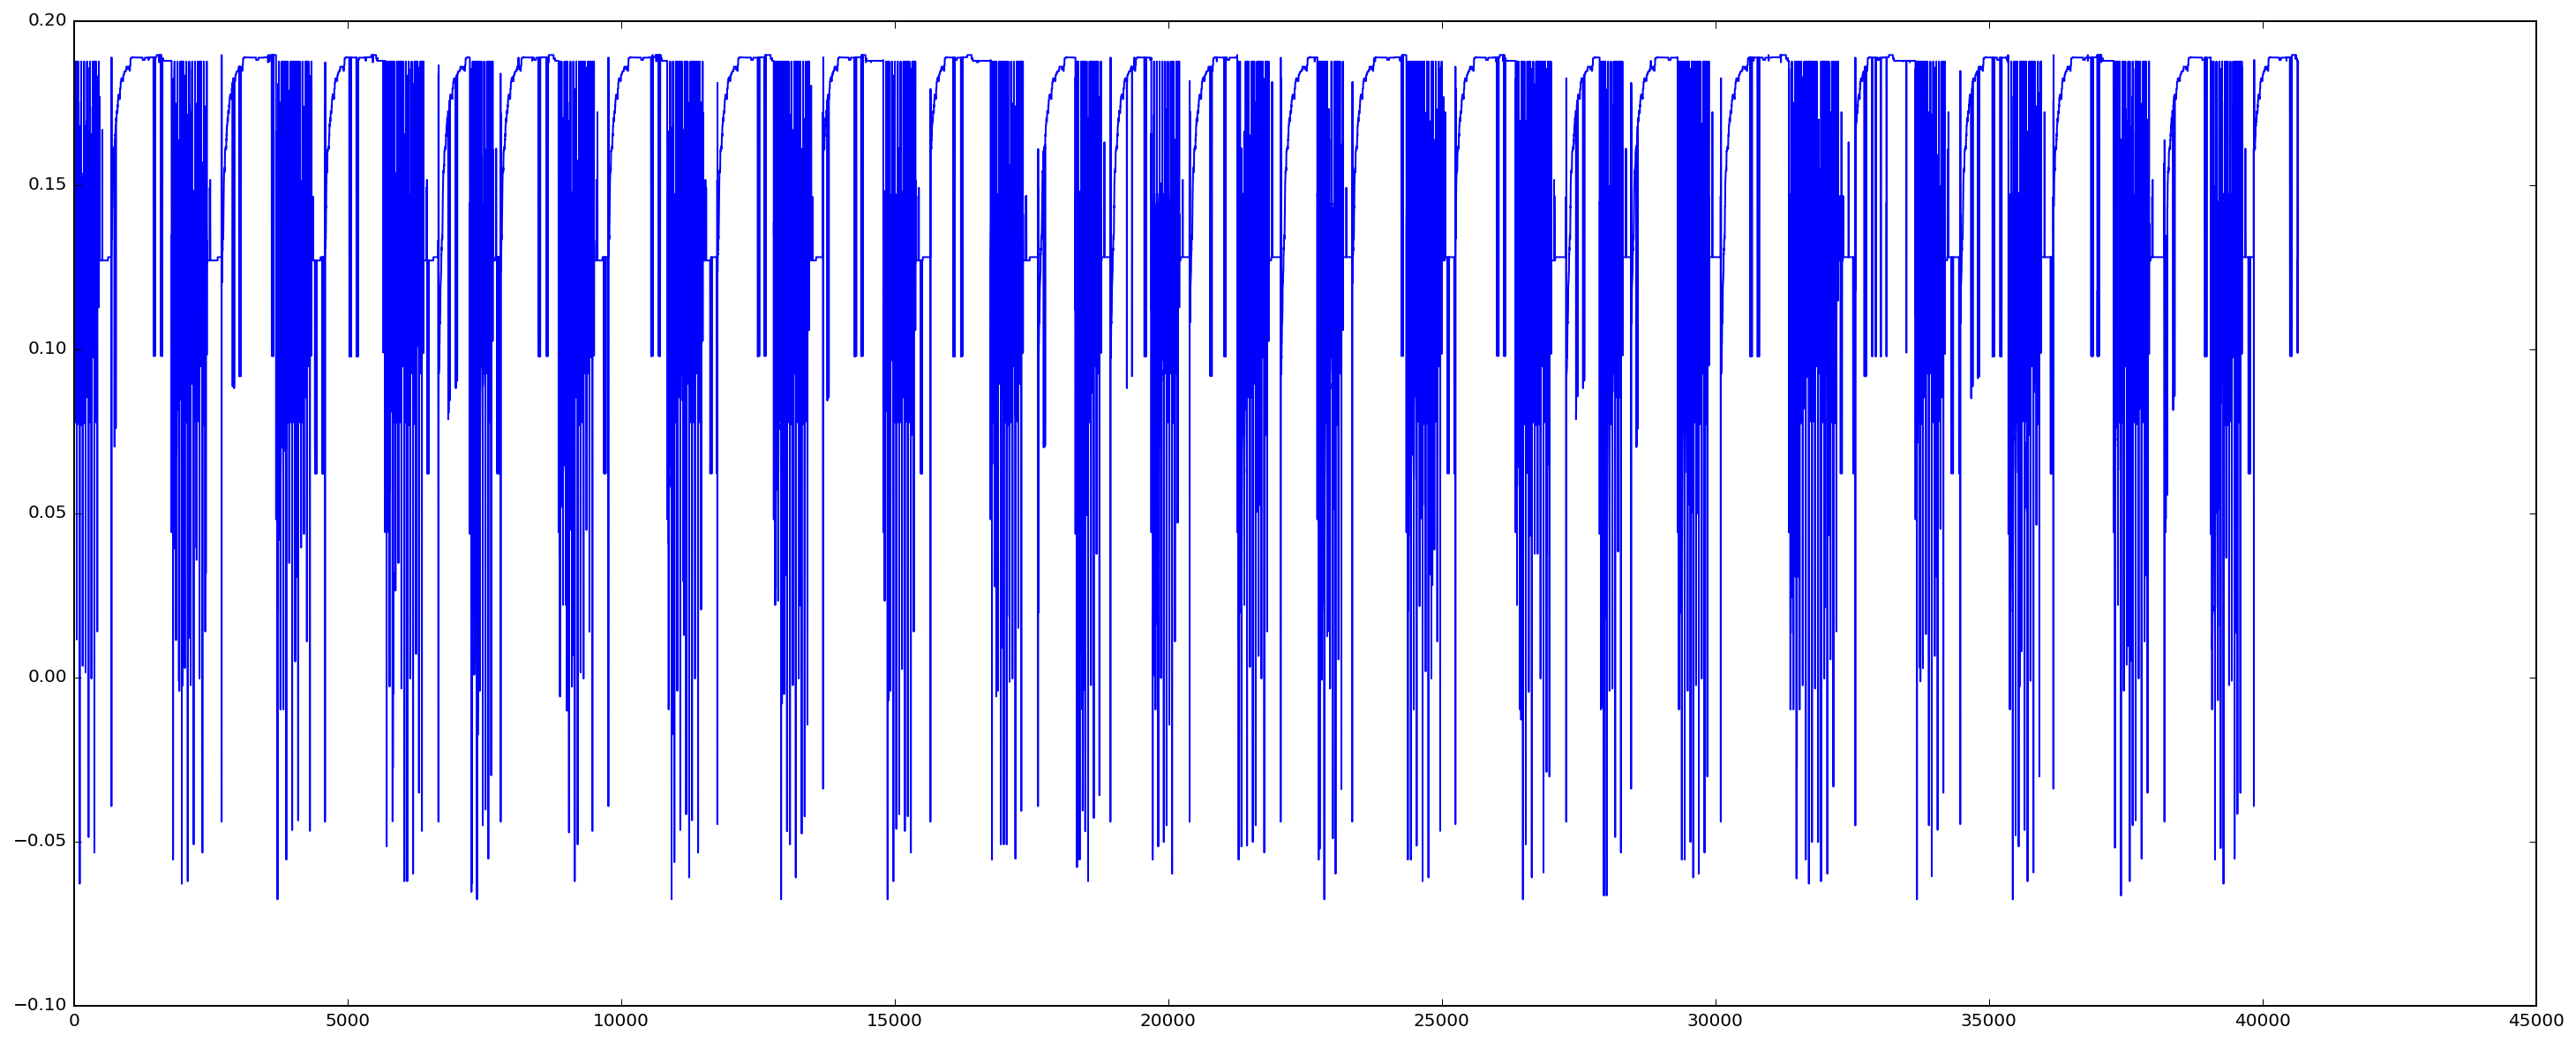

In [20]:
rcParams['figure.figsize'] = 25, 10
plt.plot(test_res)